**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab28](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab28/Lab28.ipynb)

___

# <font color=darkred>Laboratory 28: Assessing Fitness; Prediction Intervals </font>


**Medrano, Giovanni**

**R11521018**


ENGR 1330 Laboratory 28 - In Lab

___


## Background

In Lab 26 we examined regression, both using primative python and packages.  In this lab we will put these ideas into practice, and look at measures of fitness and uncertainty.

Lets start with an example.

A polymeric material contains a solvent that dissolves as a function of time.  The concentration of the solvent, expressed as a percentage of the total weight of the polymer, is shown in the table below.

|Solvent Concentration (w%)|Time(sec)|
|---:|---:|
|55.5|0|
|44.7|2|
|38.0|4|
|34.7|6|
|30.6|8|
|27.2|10|
|22.0|12| 
|15.9|14|
| 8.1|16|
| 2.9|18|
| 1.5|20|

Fit a linear data model to the data, plot the data and model.  Determine the equation of the data model and the corresponding RMSE and R$^2$ value.

In [1]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
import math
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# make a dataframe
concentration = [55.5,44.7,38.0,34.7,30.6,27.2,22.0,15.9,8.1,2.9,1.5]
time = [0,2,4,6,8,10,12,14,16,18,20]
polymer = pd.DataFrame({'Time':time, 'Conc':concentration})
polymer.head() # check if dataframe is as anticipated

,Time,Conc
0,0,55.5
1,2,44.7
2,4,38.0
3,6,34.7
4,8,30.6


In [3]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Conc ~ Time', data=polymer)
model = model.fit()
#print(model.summary())
# dir(model) # activate to find attributes
intercept = model.params[0]
slope = model.params[1]
Rsquare = model.rsquared
RMSE = math.sqrt(model.mse_total)

To find the various values a visit to [Here](https://www.statsmodels.org/stable/api.html) is useful!  Below we will construct a title line that contains the equation, RMSE, and R-square using type casting and concatenation, then pass it to the plot.

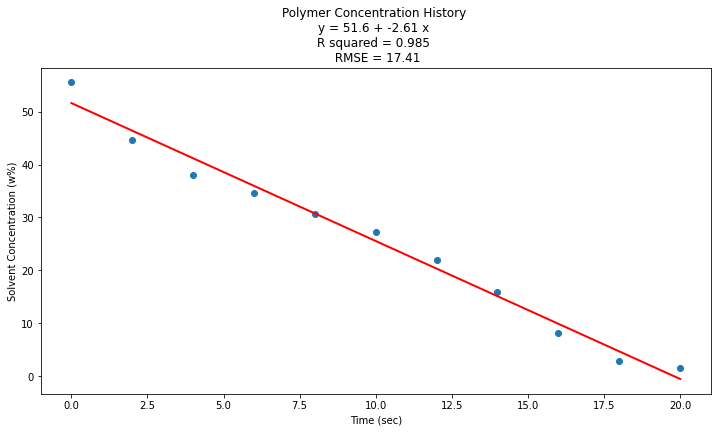

In [4]:
# Predict values
NP_pred = model.predict()

titleline = 'Polymer Concentration History \n' + 'y = ' + str(round(intercept,2)) + ' + ' + str(round(slope,2)) + ' x \n' + 'R squared = ' + str(round(Rsquare,3)) + ' \n RMSE = ' + str(round(RMSE,2))
# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(polymer['Time'], polymer['Conc'], 'o')           # scatter plot showing actual data
plt.plot(polymer['Time'], NP_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Time (sec)')
plt.ylabel('Solvent Concentration (w%)')
plt.title(titleline)

plt.show()

Now suppose we want to get an idea of prediction uncertainty, we can use ideas from the lesson;

The API calls are explained [Here](https://www.statsmodels.org/stable/regression.html)

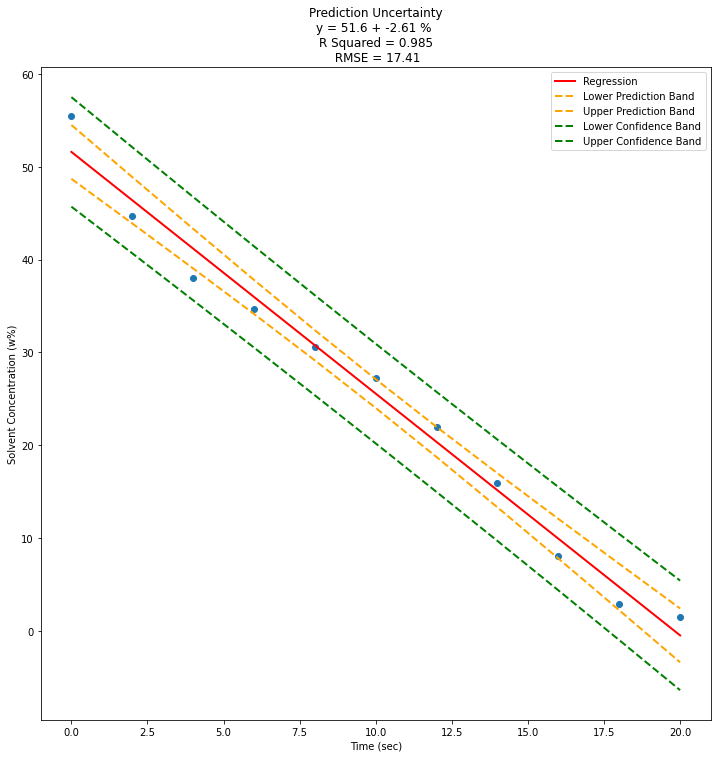

In [8]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std   #needed to get prediction interval
prstd, iv_l, iv_u = wls_prediction_std(model) #iv_l and iv_u give you the limits of the prediction interval for each point.
#print(iv_l)
#print(iv_u)
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(model, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

polymer['FittedConc']=fittedvalues
polymer['PD-Low']=predict_ci_low
polymer['PD-Upp']=predict_ci_upp
polymer['CI-Low']=predict_mean_ci_low
polymer['CI-Upp']=predict_mean_ci_upp
ddf = polymer.sort_values('Time')

newtitleline= 'Prediction Uncertainty\n'+'y = '+str(round(intercept,2))+ ' + '+str(round(slope,2))+ ' % \n'+'R Squared = '+ str(round(Rsquare,3))+'\n RMSE = '+str(round(RMSE,2))
plt.figure(figsize=(12, 12))
plt.plot(ddf['Time'], ddf['Conc'], 'o') # observation scatterplot
plt.plot(ddf['Time'], ddf['FittedConc'], 'r', linewidth=2, label = 'Regression')   # regression line
plt.plot(ddf['Time'], ddf['CI-Low'],'--', color='orange',lw=2 , label ='Lower Prediction Band') #Lower prediction band
plt.plot(ddf['Time'], ddf['CI-Upp'],'--',  color='orange',lw=2 , label = 'Upper Prediction Band') #Upper prediction band
plt.plot(ddf['Time'], ddf['PD-Low'],'--', color='green',  lw=2, label = 'Lower Confidence Band') #Lower confidence band
plt.plot(ddf['Time'], ddf['PD-Upp'], '--',color='green', lw=2, label = 'Upper Confidence Band') #Upper confidence band

#MY CODE
plt.xlabel('Time (sec)')
plt.ylabel('Solvent Concentration (w%)')
plt.legend(loc='upper right')
plt.title(newtitleline)

plt.show()


<hr>

## Exercise 1:

Fix the plot above to include a title, x and y axis labels and a legend.

<hr>

## Exercise 2:

A polymeric material contains a solvent that dissolves as a function of time.  The concentration of the solvent, expressed as a percentage of the total weight of the polymer, is shown in the table below.

|Solvent Concentration (w%)|Time(sec)|
|---:|---:|
|30.2|0|
|44.7|2|
|22.5|4|
|41.3|6|
|28.8|8|
|14.0|10|
|26.2|12| 
|11.0|14|
|23.4|16|
|14.5|18|
| 4.2|20|

Fit a linear data model to the data, plot the data and model.  Determine the equation of the data model and the corresponding RMSE and R$^2$ value. Compare the results for this data with the example, which data set produces a better fit? Why?

In [9]:
concentration2 = [30.2, 44.7, 22.5, 41.3, 28.8, 14.0, 26.2, 11.0, 23.4,14.5,4.2]
time2 = [0,2,4,6,8,10,12,14,16,18,20]

polymer2 = pd.DataFrame({'Time':time2, 'Conc':concentration2})
polymer2.head()

,Time,Conc
0,0,30.2
1,2,44.7
2,4,22.5
3,6,41.3
4,8,28.8


In [10]:
# Initialise and fit linear regression model using `statsmodels`
model2 = smf.ols('Conc ~ Time', data=polymer2)
model2 = model2.fit()
#print(model.summary())
# dir(model) # activate to find attributes
intercept2 = model2.params[0]
slope2 = model2.params[1]
Rsquare2 = model2.rsquared
RMSE2 = math.sqrt(model2.mse_total)

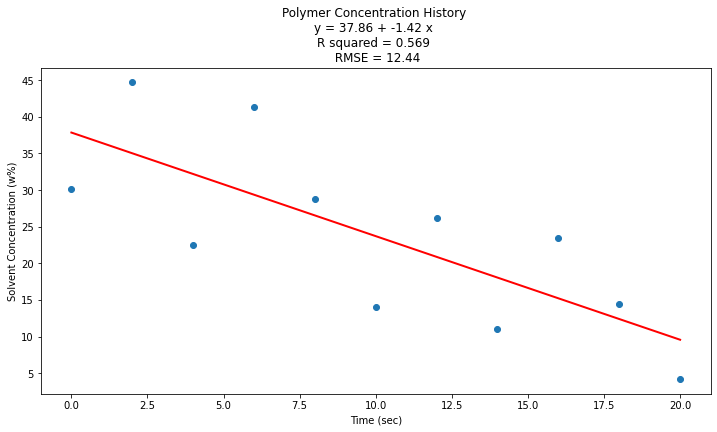

In [11]:
# Predict values
NP_pred2 = model2.predict()

titleline = 'Polymer Concentration History \n' + 'y = ' + str(round(intercept2,2)) + ' + ' + str(round(slope2,2)) + ' x \n' + 'R squared = ' + str(round(Rsquare2,3)) + ' \n RMSE = ' + str(round(RMSE2,2))
# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(polymer2['Time'], polymer2['Conc'], 'o')           # scatter plot showing actual data
plt.plot(polymer2['Time'], NP_pred2, 'r', linewidth=2)   # regression line
plt.xlabel('Time (sec)')
plt.ylabel('Solvent Concentration (w%)')
plt.title(titleline)

plt.show()

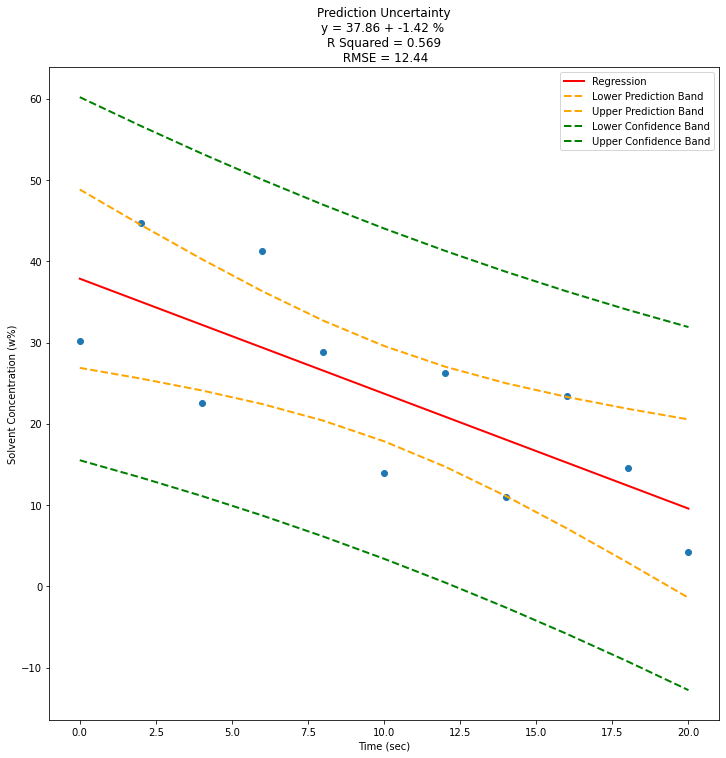

In [13]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std   #needed to get prediction interval
prstd, iv_l, iv_u = wls_prediction_std(model2) #iv_l and iv_u give you the limits of the prediction interval for each point.
#print(iv_l)
#print(iv_u)
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(model2, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

polymer2['FittedConc']=fittedvalues
polymer2['PD-Low']=predict_ci_low
polymer2['PD-Upp']=predict_ci_upp
polymer2['CI-Low']=predict_mean_ci_low
polymer2['CI-Upp']=predict_mean_ci_upp
ddf = polymer2.sort_values('Time')

newtitleline= 'Prediction Uncertainty\n'+'y = '+str(round(intercept2,2))+ ' + '+str(round(slope2,2))+ ' % \n'+'R Squared = '+ str(round(Rsquare2,3))+'\n RMSE = '+str(round(RMSE2,2))
plt.figure(figsize=(12, 12))
plt.plot(ddf['Time'], ddf['Conc'], 'o') # observation scatterplot
plt.plot(ddf['Time'], ddf['FittedConc'], 'r', linewidth=2, label = 'Regression')   # regression line
plt.plot(ddf['Time'], ddf['CI-Low'],'--', color='orange',lw=2 , label ='Lower Prediction Band') #Lower prediction band
plt.plot(ddf['Time'], ddf['CI-Upp'],'--',  color='orange',lw=2 , label = 'Upper Prediction Band') #Upper prediction band
plt.plot(ddf['Time'], ddf['PD-Low'],'--', color='green',  lw=2, label = 'Lower Confidence Band') #Lower confidence band
plt.plot(ddf['Time'], ddf['PD-Upp'], '--',color='green', lw=2, label = 'Upper Confidence Band') #Upper confidence band

#MY CODE
plt.xlabel('Time (sec)')
plt.ylabel('Solvent Concentration (w%)')
plt.legend(loc='upper right')
plt.title(newtitleline)

plt.show()
